Shift + Entrée pour avancer dans le notebook

In [6]:
from ipycanvas import Canvas
from typing import List

import math

def dessine_tresse(tresse: List[int]) -> Canvas :
    """ Dessine une tresse sur un Canvas d'après son mot
    
        Args:
            tresse: mot de tresse
            
        Return:
            le canvas avec le dessin
    """

    # calcul de la taille des éléments
    maille = 60
    demi_maille = maille / 2    
    n = abs(max(tresse, key = lambda x:abs(x))) # nombre de colonnes
    largeur = n * maille + 25  
    hauteur = len(tresse)*maille +20
   
    # création du canvas. Le dernier argument c'est pour pouvoir faire l'export en png
    canvas = Canvas(width=largeur, height = hauteur, sync_image_data=True) 
    
    # couleur et style des lignes
    canvas.fill_style = 'beige'
    canvas.fill_rect(0, 0, largeur, hauteur)
    
    canvas.line_width = maille / 10
    canvas.line_cap = 'round'
        
    canvas.shadow_color = 'black'
    canvas.shadow_offset_x = 4
    canvas.shadow_offset_y = 1
    canvas.shadow_blur = 2

    couleurs = ['red', 'green', 'blue', 'orange', 'pink', 'yellow']
    couleurs = couleurs * (n // len(couleurs) + 1) # il faut au moins autant des couleurs pour tous les brins
    
    # on prend une marge
    canvas.translate(10, 10)
    
    # on se donne une fonction pour dessiner une ligne avec un croisement sigma
    def cross(sigma): 
        colonne = abs(sigma) - 1
        canvas.save()
        
        def de_gauche_a_droite():  # pour dessiner un brin en diagonale gauche droite
            canvas.begin_path()
            canvas.stroke_style = couleurs[colonne]
            canvas.move_to(0 , 0)
            canvas.bezier_curve_to(0, demi_maille, maille, maille - demi_maille, maille, maille)
            canvas.stroke()
            
        def de_droite_a_gauche(): # pour dessiner un brin en diagonale droite gauche
            canvas.begin_path()
            canvas.stroke_style = couleurs[colonne + 1]
            canvas.move_to(maille, 0)
            canvas.bezier_curve_to(maille, demi_maille, 0, maille - demi_maille, 0, maille)
            canvas.stroke()
            
        def tout_droit(cln):        # pour dessiner brin tout droit
            canvas.begin_path()
            canvas.stroke_style = couleurs[cln]
            canvas.move_to(0 , 0)
            canvas.line_to(0, maille)
            canvas.stroke()
        
        for i in range(n+1):              # on boucle sur les colonnes
            if i == colonne:              # c'est un croisement
                if sigma > 0:             # il est positif                   
                    de_gauche_a_droite()
                    de_droite_a_gauche()
                else:                     # il est négatif
                    de_droite_a_gauche()
                    de_gauche_a_droite()
            elif i < colonne or i > colonne + 1:  # c'est tout droit
                tout_droit(i)
        
            canvas.translate(maille, 0)  # quoiqu'il arrive on se décale d'une colonne à droite      

        canvas.restore()

        # on permute les colonnes correspondant au générateur traité
        couleurs[colonne], couleurs[colonne + 1] = couleurs[colonne + 1], couleurs[colonne] 

   
    for sigma in tresse:          # on boucle sur les générateurs
        cross(sigma)              # on dessine la ligne
        canvas.translate(0, maille)  # on descend d'une ligne
        
    return canvas   


La tresse $\sigma_4 \sigma_{-2} \sigma_3 \sigma_{-2}$
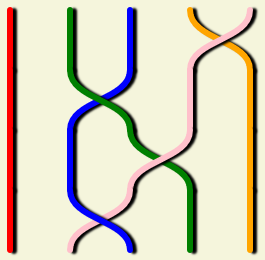

In [7]:
t1 = dessine_tresse([4, -2, 3, -2])
t1

Canvas(height=260, sync_image_data=True, width=265)

La tresse $ \sigma_4 \sigma_3 \sigma_2 \sigma_1 \sigma_{-1} \sigma_2 $
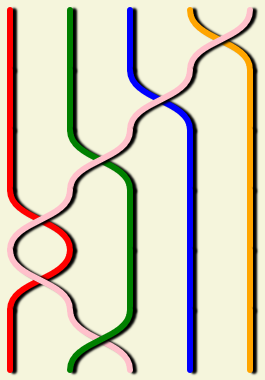

In [3]:
t2 = dessine_tresse([4, 3, 2, 1, -1, 2])
t2

Canvas(height=380, sync_image_data=True, width=265)

La tresse $ \sigma_{-1} \sigma_{-2} \sigma_{-7} $
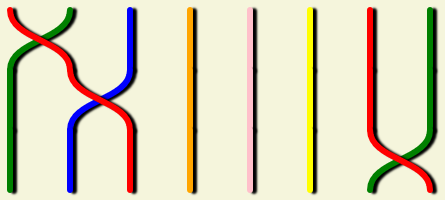

In [4]:
t3 = dessine_tresse([-1, -2, -7])
t3

Canvas(height=200, sync_image_data=True, width=445)

In [5]:
t1.to_file('../imgs/4m23m2.png')
t2.to_file('../imgs/Quatre321m12.png')
t3.to_file('../imgs/m1m2m7.png')